# ML PROJECT
Name -- Harshit Singh  
ID   -- B120026


*Project Description :-  
In this project we have given a dataset (CSV file) given with number of hours a student study and the score or percentage he/she got.    
So we have to train and test the model based on the datset and evaluate and predict the score based on number of hrs studied.*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the Dataset from CSV file**

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(url)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Taking Important Info from the dataset**

In [3]:
dataset.describe() # its a pandas method

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Finding Correlation between the variables**

# Plotting the Graph

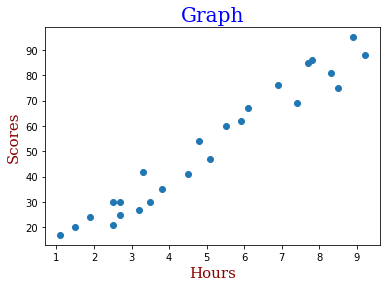

In [4]:
# dataset.plot(kind = 'scatter' , x = 'Hours', y = 'Scores')
plt.scatter(dataset['Hours'], dataset['Scores'])
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Graph", fontdict = font1)
plt.xlabel("Hours", fontdict = font2)
plt.ylabel("Scores", fontdict = font2)

plt.show()


**Creating the input data into 2-D array and output data into 1-D array**

In [5]:
x1 = dataset.iloc[:, :-1].values  
y1 = dataset.iloc[:, 1].values  

In [6]:
print(x1)
print(y1)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Implementation   
         
         
                  
 First we split the data from datasets for training and testing    
   
 For splitting we have given x1 and y1 as input. Also we have provided a ratio in which we have divided training and testing dataset.    
 
 To get a fixed number of samples or data from datasets every time we run we have used random_state method.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.041, random_state = 42)

In [8]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
[[8.3]
 [2.5]]
[21 76 62 25 42 47 35 20 27 41 95 75 30 30 24 54 67 86 60 85 17 69 88]
[81 30]


**Training the model**

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

*Now we have used fit method to train my model.*

In [10]:
lr.fit(x_train, y_train)

LinearRegression()

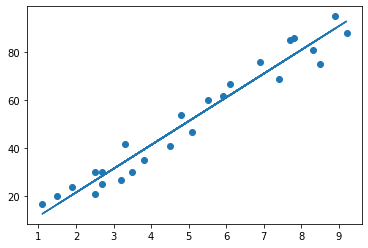

In [11]:
Y = lr.coef_ * x1 + lr.intercept_

# Plotting for the test data
plt.scatter(x1, y1)
plt.plot(x1, Y);
plt.show()

*Now Predicting the scores*

In [12]:
lr.predict(x_test)

array([84.00249582, 26.60546778])

In [13]:
y_test

array([81, 30], dtype=int64)

In [14]:
y_pred = lr.predict(x_test)

In [15]:
comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(comparison)

   Actual  Predicted
0      81  84.002496
1      30  26.605468


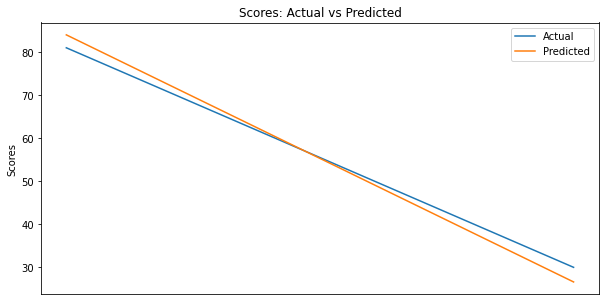

In [16]:
A = y_test.reshape(-1, 1)
B = y_pred.reshape(-1, 1)
plt.rcParams['figure.figsize'] = 10,5
plt.figure()
plt.plot(A[-100:], label="Actual")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Scores: Actual vs Predicted")
plt.ylabel("Scores")
plt.xticks(())
plt.show()

**Evaluating the model**

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_absolute_error(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred)*100)

3.198514024612681
10.268915100500191
98.42077430211454


*Checking the accuracy of the model using score method*

In [18]:
lr.score(x_test, y_test)

0.9842077430211454

# Checking and predicting by giving input

In [19]:
# Enter the input or no. of Hours to predict the score
i = eval(input())
# Considering a student not studying more than 9.9 hours in a day.

6.6


In [20]:
if (i>9.9):
    print("Invalid Input!")
else:
    hours = [[i]]
    pred = lr.predict(hours)
    print("No of Hours = {}".format(*hours[0]))
    print(*hours)
    print("Predicted Score = {}".format(pred[0]))
    print(pred)

No of Hours = 6.6
[6.6]
Predicted Score = 67.17922898227965
[67.17922898]
